In [4]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 파일 로드
normal_data = pd.read_csv('./csv/5000hz/300rpm/300rpm high-speed damage/stream2024_4_23_0_19.csv')
faulty_data = pd.read_csv('./csv/5000hz/300rpm/300rpm normal data/stream2024_4_22_23_19.csv')

# 정상 데이터에 레이블 0(정상) 할당, 비정상 데이터에 레이블 1(비정상) 할당
normal_data['label'] = 0
faulty_data['label'] = 1

# 데이터 결합
combined_data = pd.concat([normal_data, faulty_data], ignore_index=True)

print(combined_data)

        motor1_x  motor1_y  motor1_z     sound                         time   
0       0.000998  0.000367  0.046440 -0.007836  2024-04-22T15:19:00.094122Z  \
1       0.005416  0.000052  0.174876 -0.005627  2024-04-22T15:19:00.094322Z   
2       0.007310  0.000683 -0.034970 -0.011938  2024-04-22T15:19:00.094522Z   
3       0.023404  0.000367 -0.073462 -0.007205  2024-04-22T15:19:00.094722Z   
4      -0.028029  0.000683  0.045493 -0.007836  2024-04-22T15:19:00.094922Z   
...          ...       ...       ...       ...                          ...   
599995  0.002576  0.000367 -0.114479 -0.006258  2024-04-22T14:20:00.200178Z   
599996 -0.001841  0.000998  0.026244 -0.006889  2024-04-22T14:20:00.200378Z   
599997 -0.005312  0.000367  0.110500 -0.005943  2024-04-22T14:20:00.200578Z   
599998 -0.000895  0.000683  0.091566 -0.009098  2024-04-22T14:20:00.200778Z   
599999  0.009834  0.000683 -0.094286 -0.007205  2024-04-22T14:20:00.200978Z   

        label  
0           0  
1           0  
2  

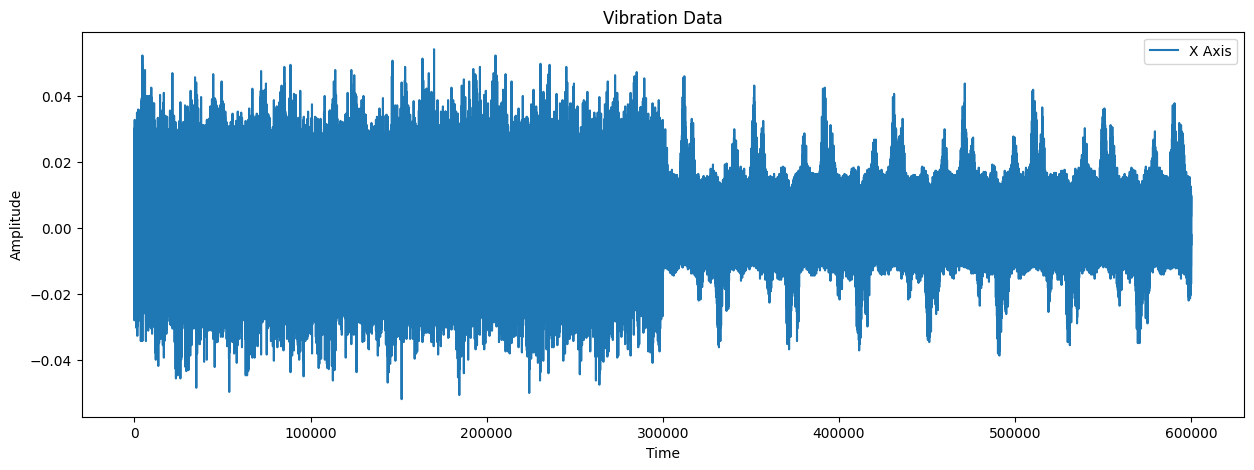

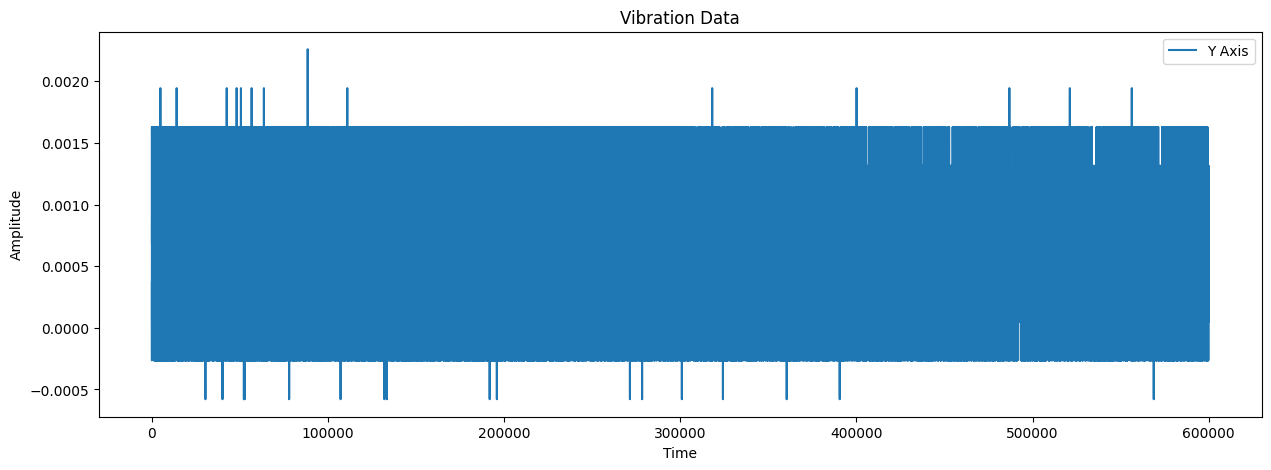

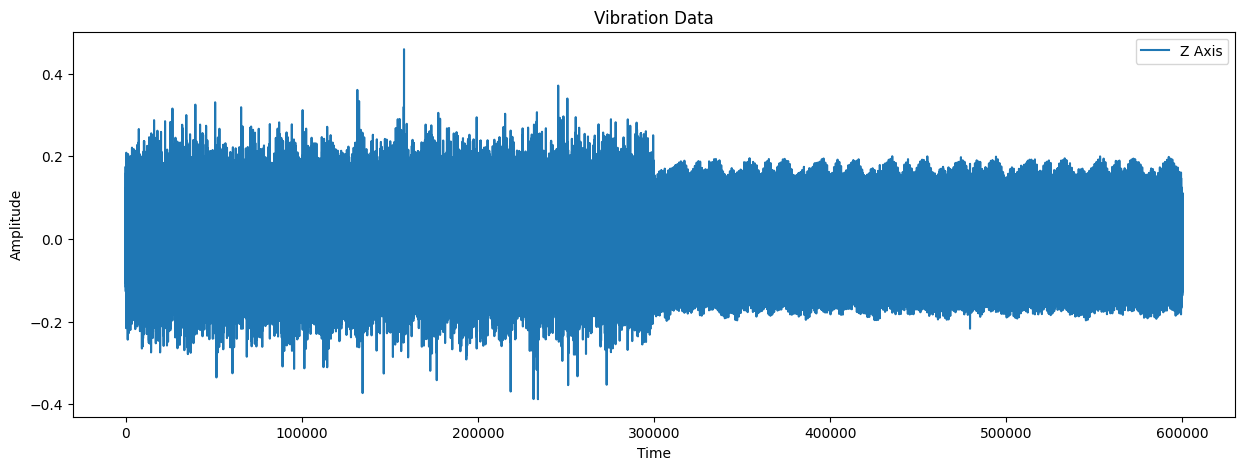

In [6]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(combined_data['motor1_x'], label='X Axis')
#plt.plot(normal_data['motor_y'], label='Y Axis')
#plt.plot(normal_data['motor_z'], label='Z Axis')
plt.title('Vibration Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))
#plt.plot(combined_data['motor_x'], label='X Axis')
plt.plot(combined_data['motor1_y'], label='Y Axis')
#plt.plot(combined_data['motor_z'], label='Z Axis')
plt.title('Vibration Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))
#plt.plot(combined_data['motor_x'], label='X Axis')
#plt.plot(combined_data['motor_y'], label='Y Axis')
plt.plot(combined_data['motor1_z'], label='Z Axis')
plt.title('Vibration Data')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

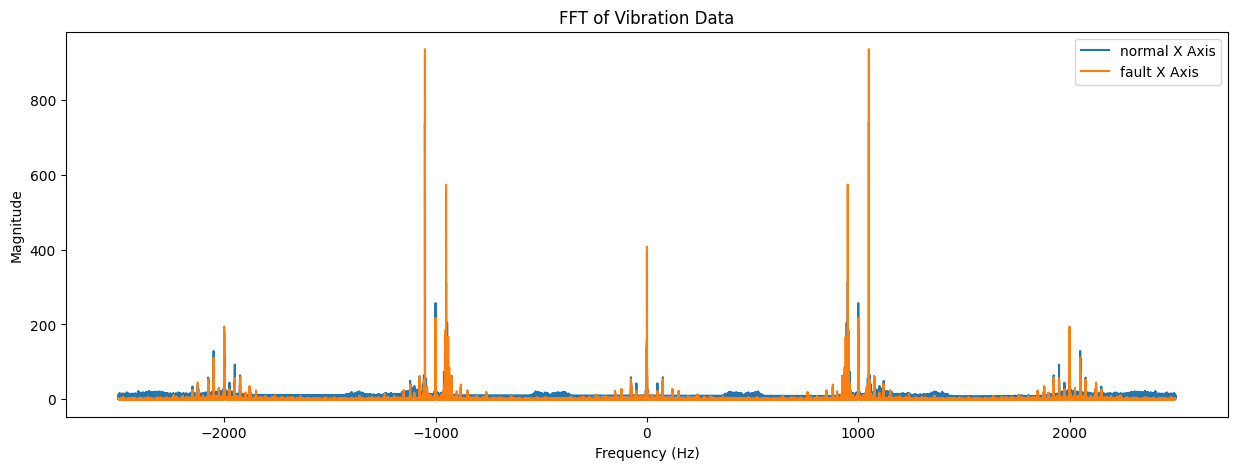

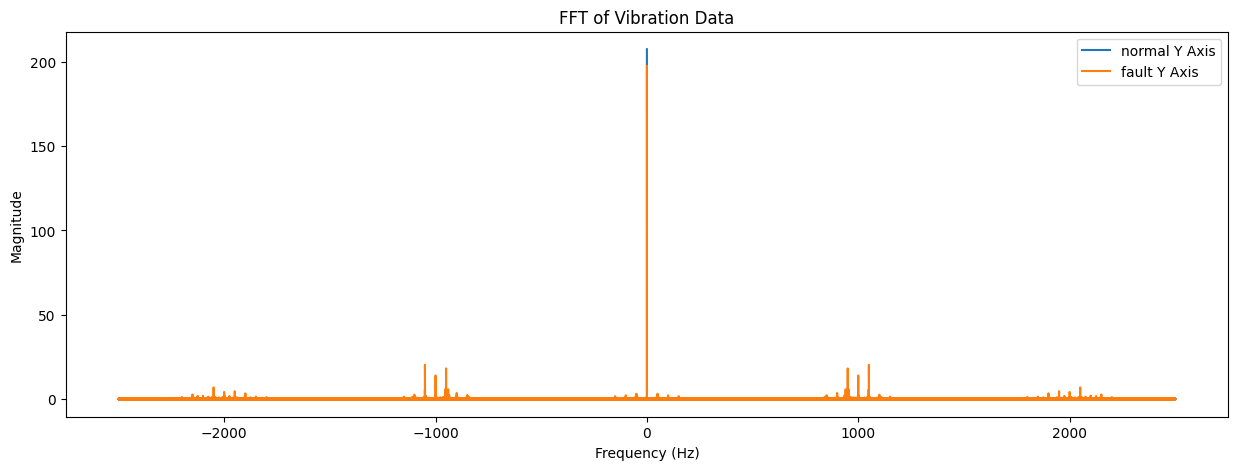

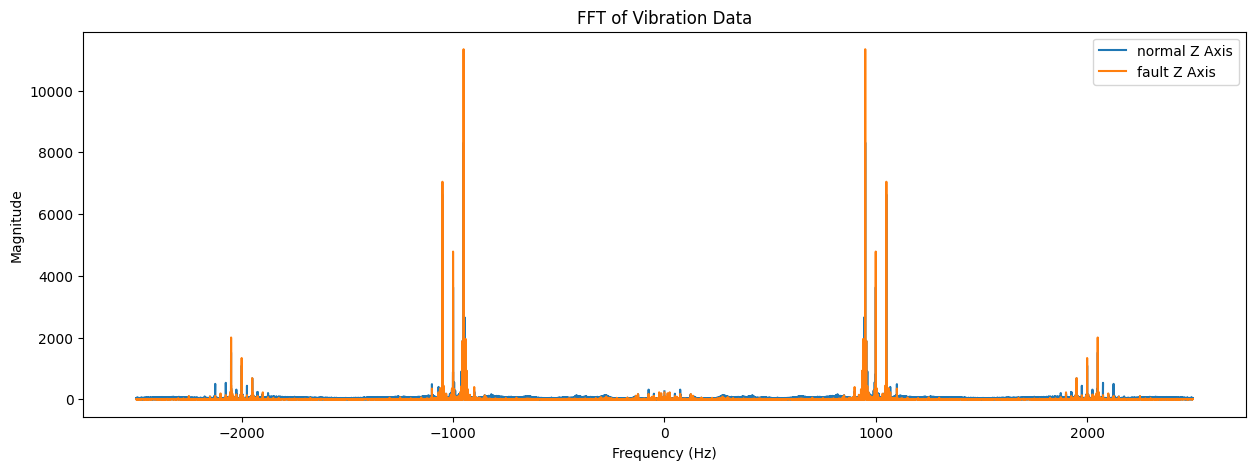

In [7]:
import numpy as np

# FFT 변환
fft_x = np.fft.fft(normal_data['motor1_x'])
fft_y = np.fft.fft(normal_data['motor1_y'])
fft_z = np.fft.fft(normal_data['motor1_z'])

fft_x_f = np.fft.fft(faulty_data['motor1_x'])
fft_y_f = np.fft.fft(faulty_data['motor1_y'])
fft_z_f = np.fft.fft(faulty_data['motor1_z'])

# 주파수 축 생성
freq = np.fft.fftfreq(len(fft_x), d=1/5000)  # '5000hz'는 데이터의 샘플링 레이트

plt.figure(figsize=(15, 5))

# FFT 결과의 크기 (magnitude) 시각화
plt.plot(freq, np.abs(fft_x), label='normal X Axis')
plt.plot(freq, np.abs(fft_x_f), label='fault X Axis')
#plt.plot(freq, np.abs(fft_y), label='Y Axis')
#plt.plot(freq, np.abs(fft_z), label='Z Axis')

# 그래프 타이틀 및 레이블 설정
plt.title('FFT of Vibration Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))

# FFT 결과의 크기 (magnitude) 시각화
#plt.plot(freq, np.abs(fft_x), label='X Axis')
plt.plot(freq, np.abs(fft_y), label='normal Y Axis')
plt.plot(freq, np.abs(fft_y_f), label='fault Y Axis')
#plt.plot(freq, np.abs(fft_z), label='Z Axis')

# 그래프 타이틀 및 레이블 설정
plt.title('FFT of Vibration Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

plt.figure(figsize=(15, 5))

# FFT 결과의 크기 (magnitude) 시각화
#plt.plot(freq, np.abs(fft_x), label='X Axis')
#plt.plot(freq, np.abs(fft_y), label='Y Axis')
plt.plot(freq, np.abs(fft_z), label='normal Z Axis')
plt.plot(freq, np.abs(fft_z_f), label='fault Z Axis')

# 그래프 타이틀 및 레이블 설정
plt.title('FFT of Vibration Data')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.show()


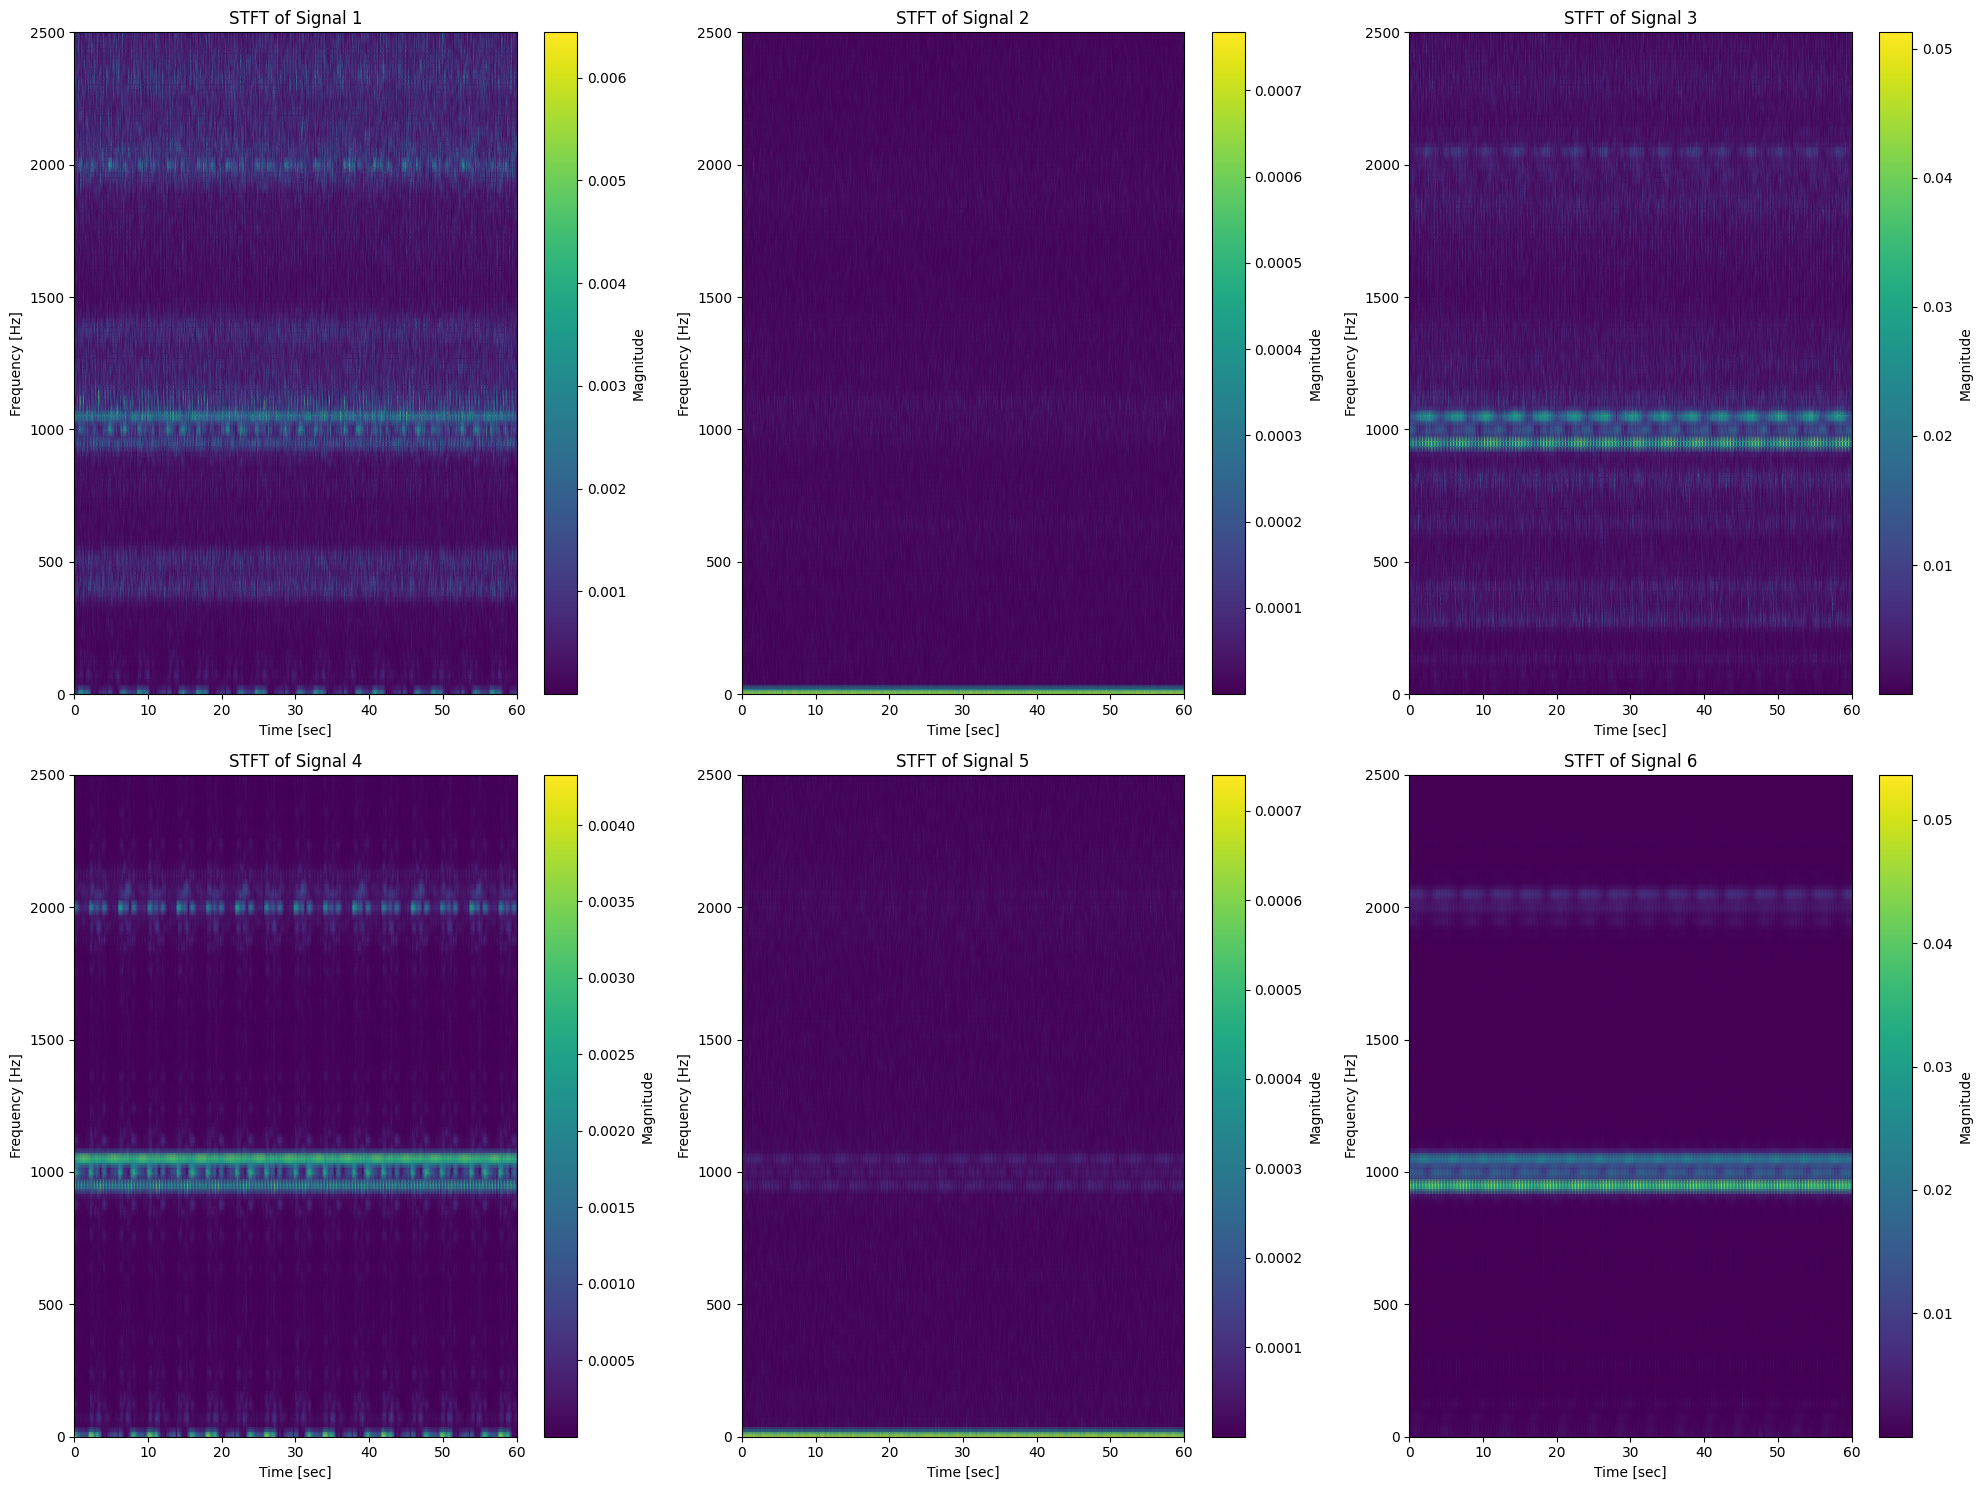

In [8]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

signals = [normal_data['motor1_x'], normal_data['motor1_y'], normal_data['motor1_z'],
          faulty_data['motor1_x'], faulty_data['motor1_y'], faulty_data['motor1_z']]

plt.figure(figsize=(20, 15))

for i, signal in enumerate(signals, 1):
    f, t, Zxx = scipy.signal.stft(signal, fs=5000)
    
    plt.subplot(2, 3, i)
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    plt.title(f'STFT of Signal {i}')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Magnitude')

plt.tight_layout()
plt.show()


# f, t, Zxx = scipy.signal.stft(faulty_data['motor_x'], fs=5000)

# plt.figure(figsize=(15, 5))
# plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
# plt.title('STFT Magnitude')
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.colorbar(label='Magnitude')
# plt.show()


In [51]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

# 1. STFT 데이터 준비
# 정상 데이터와 고장 데이터의 STFT 결과를 준비합니다.
# 예시에서는 이미 STFT 변환을 수행했다고 가정합니다.
# `normal_stft`와 `faulty_stft`는 각각 정상 및 고장 데이터의 STFT 변환 결과를 나타냅니다.

normal_stft = [scipy.signal.stft(signal, fs=5000)[2] for signal in signals[:3]]
faulty_stft = [scipy.signal.stft(signal, fs=5000)[2] for signal in signals[3:]]

# 각 데이터 세트의 샘플 수 확인
num_normal_samples = len(normal_stft)
num_faulty_samples = len(faulty_stft)

print(num_normal_samples)
print(num_faulty_samples)

# STFT 결과의 샘플 수 확인 및 레이블 배열 생성
y_normal = [0] * sum(x.shape[0] for x in normal_stft)
y_faulty = [1] * sum(x.shape[0] for x in faulty_stft)
y = np.array(y_normal + y_faulty)

# 데이터 크기 확인
print("X shape:", X.shape)
print("y shape:", y.shape)

# 데이터 분할 및 모델 구축은 이전과 동일


# 2. 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=98)

# 3. CNN 모델 구축 및 훈련
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
# 첫 번째 컨볼루션 레이어: 필터 크기를 (1, 1)로 조정
model.add(Conv2D(16, kernel_size=(1, 1), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
# 여기서 MaxPooling 생략 또는 pool_size 조정

# 두 번째 컨볼루션 레이어: 필터 크기를 (1, 1)로 조정
model.add(Conv2D(32, kernel_size=(1, 1), activation='relu'))

model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# 얼리스탑 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)



history = model.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping])  # 얼리스탑 콜백 추가)

# 모델 서머리
model.summary()

# 훈련 과정에서의 손실과 정확도를 확인
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# 훈련 및 검증 데이터에 대한 손실 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 훈련 및 검증 데이터에 대한 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 모델을 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

3
3
X shape: torch.Size([6, 1, 129, 41])
y shape: (774,)


ValueError: Found input variables with inconsistent numbers of samples: [6, 774]